In [51]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [52]:
from google.colab import drive # mounting the google drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [53]:
df = pd.read_csv("dataset-tickets-multi-lang3-4k[1].csv")

In [54]:
df.head()

,subject,body,answer,type,queue,priority,language,business_type,tag_1,tag_2,tag_3,tag_4,tag_5,tag_6,tag_7,tag_8,tag_9
0,Problema crítico del servidor requiere atenció...,Es necesaria una investigación inmediata sobre...,Estamos investigando urgentemente el problema ...,Incident,Technical Support,high,es,IT Services,Urgent Issue,Service Disruption,Incident Report,Service Recovery,System Maintenance,NaN,NaN,NaN,NaN
1,Anfrage zur Verfügbarkeit des Dell XPS 13 9310,"Sehr geehrter Kundenservice,\n\nich hoffe, die...","Sehr geehrter <name>,\n\nvielen Dank, dass Sie...",Request,Customer Service,low,de,Tech Online Store,Sales Inquiry,Product Support,Customer Service,Order Issue,Returns and Exchanges,NaN,NaN,NaN,NaN
2,Erro na Autocompletação de Código do IntelliJ ...,"Prezado Suporte ao Cliente <name>,\n\nEstou es...","Prezado <name>,\n\nObrigado por entrar em cont...",Incident,Technical Support,high,pt,IT Services,Technical Support,Software Bug,Problem Resolution,Urgent Issue,IT Support,NaN,NaN,NaN,NaN
3,Urgent Assistance Required: AWS Service,"Dear IT Services Support Team, \n\nI am reachi...","Dear <name>,\n\nThank you for reaching out reg...",Request,IT Support,high,en,IT Services,IT Support,Urgent Issue,Service Notification,Cloud Services,Problem Resolution,Technical Guidance,Performance Tuning,NaN,NaN
4,Problème d'affichage de MacBook Air,Cher équipe de support du magasin en ligne Tec...,"Cher <name>,\n\nMerci de nous avoir contactés ...",Incident,Product Support,low,fr,Tech Online Store,Technical Support,Product Support,Hardware Failure,Service Recovery,Routine Request,NaN,NaN,NaN,NaN


In [55]:
df.shape

(4000, 17)

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   subject        3533 non-null   object 
 1   body           3999 non-null   object 
 2   answer         4000 non-null   object 
 3   type           4000 non-null   object 
 4   queue          4000 non-null   object 
 5   priority       4000 non-null   object 
 6   language       4000 non-null   object 
 7   business_type  4000 non-null   object 
 8   tag_1          4000 non-null   object 
 9   tag_2          4000 non-null   object 
 10  tag_3          4000 non-null   object 
 11  tag_4          3999 non-null   object 
 12  tag_5          3363 non-null   object 
 13  tag_6          2181 non-null   object 
 14  tag_7          1045 non-null   object 
 15  tag_8          269 non-null    object 
 16  tag_9          0 non-null      float64
dtypes: float64(1), object(16)
memory usage: 531.4+ KB


In [57]:
df.columns

Index(['subject', 'body', 'answer', 'type', 'queue', 'priority', 'language',
       'business_type', 'tag_1', 'tag_2', 'tag_3', 'tag_4', 'tag_5', 'tag_6',
       'tag_7', 'tag_8', 'tag_9'],
      dtype='object')

In [58]:
df.nunique()

,0
subject,3533
body,3999
answer,4000
type,4
queue,10
priority,3
language,5
business_type,9
tag_1,42
tag_2,61


In [59]:
df['language'].unique()


array(['es', 'de', 'pt', 'en', 'fr'], dtype=object)

In [60]:
df['subject'].unique()

array(['Problema crítico del servidor requiere atención inmediata',
       'Anfrage zur Verfügbarkeit des Dell XPS 13 9310',
       'Erro na Autocompletação de Código do IntelliJ IDEA', ...,
       'Problemas com a impressora HP DeskJet 3755',
       'Problema urgente con el envío',
       'Overcharge on yearly Microsoft Office 365 subscription'],
      dtype=object)

In [61]:
df['language'].unique()

array(['es', 'de', 'pt', 'en', 'fr'], dtype=object)

In [62]:
df['type'].unique()

array(['Incident', 'Request', 'Change', 'Problem'], dtype=object)

In [63]:
df['business_type'].unique()

array(['IT Services', 'Tech Online Store', 'IT Consulting Firm',
       'Online Store', 'Software Development Company', 'Pit Services',
       'Adobe Photoshop 2024', '_IT_Services_', 'IT Consulting Service'],
      dtype=object)

In [65]:
#1.Cluster the data (eg: 'subject', 'body')

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans

df['subject'] = df['subject'].fillna('')
df['body'] = df['body'].fillna('')

text_data = df['subject'] + ' ' + df['body']

# Create TF-IDF vectors
vectorizer = TfidfVectorizer(stop_words='english') # Consider removing stop words
X = vectorizer.fit_transform(text_data)

# Determine optimal number of clusters (e.g., using the elbow method or silhouette analysis)
# For demonstration, let's assume 5 clusters
num_clusters = 5

# Apply KMeans clustering
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
kmeans.fit(X)

# Add cluster labels to the DataFrame
df['cluster'] = kmeans.labels_

# Analyze the clusters
print(df.groupby('cluster').size())  # See the size of each cluster
# You can examine the top features for each cluster to understand its characteristics:
order_centroids = kmeans.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names_out()
for i in range(num_clusters):
  print(f"Cluster {i}:")
  for ind in order_centroids[i, :10]:  # Print top 10 features
      print(' %s' % terms[ind])

cluster
0    1330
1    1245
2     822
3     140
4     463
dtype: int64
Cluster 0:
 issue
 support
 thank
 customer
 dear
 assistance
 request
 team
 issues
 regards
Cluster 1:
 la
 en
 para
 que
 el
 su
 pour
 este
 problema
 por
Cluster 2:
 ich
 zu
 und
 die
 sie
 mit
 der
 für
 um
 ihre
Cluster 3:
 macbook
 air
 m1
 battery
 issue
 store
 support
 online
 customer
 thank
Cluster 4:
 para
 sua
 em
 que
 com
 problema
 suporte
 da
 uma
 ao


In [78]:
df1=df[['subject', 'body']]
df1.head()

,subject,body
0,Problema crítico del servidor requiere atenció...,Es necesaria una investigación inmediata sobre...
1,Anfrage zur Verfügbarkeit des Dell XPS 13 9310,"Sehr geehrter Kundenservice,\n\nich hoffe, die..."
2,Erro na Autocompletação de Código do IntelliJ ...,"Prezado Suporte ao Cliente <name>,\n\nEstou es..."
3,Urgent Assistance Required: AWS Service,"Dear IT Services Support Team, \n\nI am reachi..."
4,Problème d'affichage de MacBook Air,Cher équipe de support du magasin en ligne Tec...


In [81]:

from sklearn.feature_extraction.text import TfidfVectorizer


df1=df[['subject', 'body']]
df1.head()

# Convert 'subject' and 'body' to numerical representations using TF-IDF
vectorizer = TfidfVectorizer()

# Fit and transform the 'subject' column
subject_vectors = vectorizer.fit_transform(df1['subject'])
subject_df = pd.DataFrame(subject_vectors.toarray(), columns=vectorizer.get_feature_names_out())

# Fit and transform the 'body' column (using the same vectorizer for consistency)
body_vectors = vectorizer.transform(df1['body'])  # Use transform, not fit_transform
body_df = pd.DataFrame(body_vectors.toarray(), columns=vectorizer.get_feature_names_out())


# Concatenate the numerical representations with the original DataFrame
df_numerical = pd.concat([df1, subject_df, body_df], axis=1)

# Now you have numerical representations of 'subject' and 'body' in df_numerical
print(df_numerical.head())

                                             subject  \
0  Problema crítico del servidor requiere atenció...   
1     Anfrage zur Verfügbarkeit des Dell XPS 13 9310   
2  Erro na Autocompletação de Código do IntelliJ ...   
3            Urgent Assistance Required: AWS Service   
4                Problème d'affichage de MacBook Air   

                                                body   04  102   11        13  \
0  Es necesaria una investigación inmediata sobre...  0.0  0.0  0.0  0.000000   
1  Sehr geehrter Kundenservice,\n\nich hoffe, die...  0.0  0.0  0.0  0.284399   
2  Prezado Suporte ao Cliente <name>,\n\nEstou es...  0.0  0.0  0.0  0.000000   
3  Dear IT Services Support Team, \n\nI am reachi...  0.0  0.0  0.0  0.000000   
4  Cher équipe de support du magasin en ligne Tec...  0.0  0.0  0.0  0.000000   

    14  19c   20  2021  ...  évaluation  öffnen  über  überhitzt  überhitzung  \
0  0.0  0.0  0.0   0.0  ...         0.0     0.0   0.0        0.0          0.0   
1  0.0  0.0  0

In [82]:


from collections import Counter

def get_top_tags(cluster_data):
    all_tags = []
    for _, row in cluster_data.iterrows():
        tags = row['subject'].split()  # Assuming tags are space-separated in 'subject'
        all_tags.extend(tags)
    tag_counts = Counter(all_tags)
    total_tags = sum(tag_counts.values())
    top_tags = []
    for tag, count in tag_counts.most_common():
      top_tags.append(f"{tag} ({count/total_tags*100:.2f}%)")
    return ", ".join(top_tags)

cluster_tags = {}
for cluster_num in df['cluster'].unique():
    cluster_data = df[df['cluster'] == cluster_num]
    cluster_tags[cluster_num] = get_top_tags(cluster_data)

for cluster_num, tags in cluster_tags.items():
    print(f"Cluster {cluster_num}: {tags}")

Cluster 1: de (14.18%), la (3.34%), con (2.25%), Problema (1.97%), para (1.78%), AWS (1.75%), Solicitud (1.72%), en (1.45%), del (1.44%), el (1.43%), Demande (1.40%), Asistencia (1.25%), Problemas (1.25%), Problème (1.10%), : (1.02%), pour (0.92%), Urgente: (0.88%), Dell (0.88%), XPS (0.86%), 13 (0.80%), le (0.76%), avec (0.75%), Jira (0.71%), du (0.70%), Cisco (0.66%), urgente (0.64%), Problèmes (0.58%), des (0.55%), ISR4331 (0.51%), sobre (0.51%), Urgent (0.51%), Pro (0.48%), Assistance (0.48%), requise (0.46%), conectividad (0.46%), sur (0.44%), Surface (0.41%), facturación (0.40%), 7 (0.40%), Urgente (0.40%), Consulta (0.39%), HP (0.38%), configuración (0.37%), à (0.37%), problemas (0.35%), DeskJet (0.34%), Software (0.34%), Canon (0.33%), 3755 (0.33%), impresora (0.32%), Zoom (0.32%), 9310 (0.32%), y (0.31%), configuration (0.31%), necesaria (0.31%), facturation (0.30%), connectivité (0.30%), PIXMA (0.30%), MG3620 (0.29%), nécessaire (0.27%), d'assistance (0.27%), MacBook (0.26%),

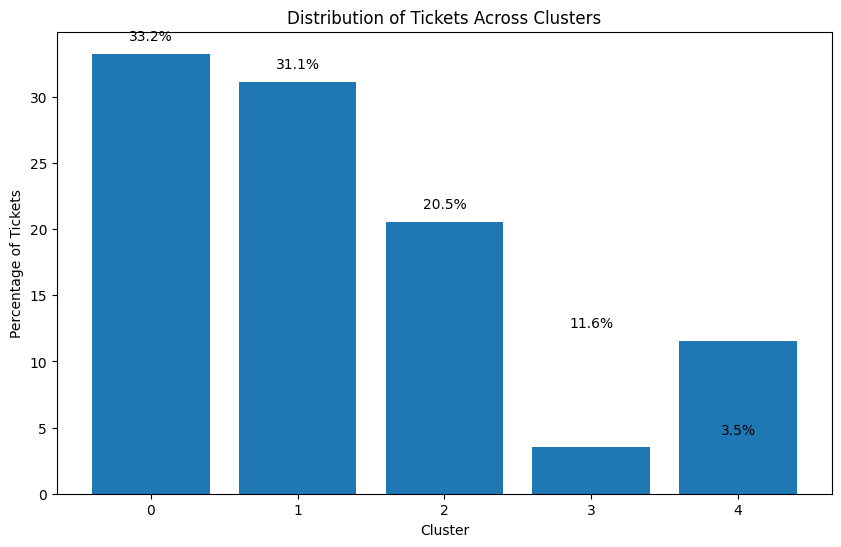

In [92]:


import matplotlib.pyplot as plt


cluster_percentages = df['cluster'].value_counts(normalize=True) * 100

plt.figure(figsize=(10, 6))
plt.bar(cluster_percentages.index, cluster_percentages.values)
plt.xlabel("Cluster")
plt.ylabel("Percentage of Tickets")
plt.title("Distribution of Tickets Across Clusters")

# Add percentage labels above each bar
for i, v in enumerate(cluster_percentages.values):
    plt.text(i, v + 1, f"{v:.1f}%", ha='center')

plt.show()

In [90]:


from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')

stop_words = set(stopwords.words('english'))

def remove_stopwords(text):
    words = text.split()
    filtered_words = [word for word in words if word.lower() not in stop_words]
    return " ".join(filtered_words)

df['subject_no_stopwords'] = df['type'].apply(remove_stopwords)
df['body_no_stopwords'] = df['business_type'].apply(remove_stopwords)

text_data_no_stopwords = df['subject_no_stopwords'] + ' ' + df['body_no_stopwords']

vectorizer = TfidfVectorizer()
X_no_stopwords = vectorizer.fit_transform(text_data_no_stopwords)

num_clusters = 5
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
kmeans.fit(X_no_stopwords)
df['cluster_no_stopwords'] = kmeans.labels_

# Analyze the clusters (optional)
print(df.groupby('cluster_no_stopwords').size())

# Visualization (PCA)
pca = PCA(n_components=3)
principal_components = pca.fit_transform(df_numerical.select_dtypes(include=np.number))
df_en = pd.DataFrame(data=principal_components, columns=['principal component 1', 'principal component 2', 'principal component 3'])
df_en['tag_1'] = df['cluster_no_stopwords'] # Coloring by new cluster labels

fig = px.scatter_3d(df_en, x='principal component 1', y='principal component 2', z='principal component 3', color='tag_1')
fig.show()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


cluster_no_stopwords
0     398
1     513
2     355
3    1168
4    1566
dtype: int64


In [85]:
#3.Find a way to get issues for every ticket (either using POS Tagging, NER, Dependency Parser or something else)
import spacy


nlp = spacy.load("en_core_web_sm")

def extract_issues(text):
  doc = nlp(text)
  issues = []
  for token in doc:
    if token.pos_ in ["NOUN", "PROPN", "ADJ"] and token.dep_ in ["nsubj", "dobj", "pobj", "amod", "acomp"]:
      issues.append(token.text)
  return ", ".join(issues)

df['extracted_issues'] = df['subject'] + ' ' + df['body']
df['extracted_issues'] = df['extracted_issues'].apply(extract_issues)

print(df[['subject', 'body', 'extracted_issues']].head())

                                             subject  \
0  Problema crítico del servidor requiere atenció...   
1     Anfrage zur Verfügbarkeit des Dell XPS 13 9310   
2  Erro na Autocompletação de Código do IntelliJ ...   
3            Urgent Assistance Required: AWS Service   
4                Problème d'affichage de MacBook Air   

                                                body  \
0  Es necesaria una investigación inmediata sobre...   
1  Sehr geehrter Kundenservice,\n\nich hoffe, die...   
2  Prezado Suporte ao Cliente <name>,\n\nEstou es...   
3  Dear IT Services Support Team, \n\nI am reachi...   
4  Cher équipe de support du magasin en ligne Tec...   

                                    extracted_issues  
0                           interrupción, esenciales  
1  diese, schreibe, Verfügbarkeit, erkundigen, Si...  
2  Código, name, atenção, desenvolvimento, signif...  
3  Team, high, ticket, Service, significant, chal...  
4  Cher, magasin, vous, Bien, satisfaction, penda..

In [99]:

from sklearn.metrics.pairwise import cosine_similarity

def calculate_similarity_within_cluster(df, cluster_id):
    cluster_data = df[df['cluster'] == cluster_id]

    # Combine 'body' and 'answer' text for similarity calculation (if 'answer' column exists)
    if 'answer' in df.columns:
      text_data = cluster_data['body'] + ' ' + cluster_data['answer']
    else:
      text_data = cluster_data['body']

    vectorizer = TfidfVectorizer()
    vectors = vectorizer.fit_transform(text_data)
    similarity_matrix = cosine_similarity(vectors)

    # Calculate average similarity within the cluster
    np.fill_diagonal(similarity_matrix, 0)  # Exclude self-similarity
    average_similarity = np.mean(similarity_matrix)

    return average_similarity

# Example usage (assuming 'answer' column exists)
for cluster_id in df['cluster'].unique():
    avg_similarity = calculate_similarity_within_cluster(df, cluster_id)
    print(f"Average Similarity in Cluster {cluster_id}: {avg_similarity}")

# Product-specific analysis (example, assuming 'product' column exists)
if 'product' in df.columns:
  for product in df['product'].unique():
    product_data = df[df['product'] == product]
    for cluster_id in product_data['cluster'].unique():
      avg_similarity = calculate_similarity_within_cluster(product_data, cluster_id)
      print(f"Average Similarity in Cluster {cluster_id} for Product {product}: {avg_similarity}")

Average Similarity in Cluster 4: 0.17404195772815184
Average Similarity in Cluster 2: 0.16541422844023626
Average Similarity in Cluster 1: 0.12219154117156408
Average Similarity in Cluster 3: 0.13658776694657668


In [102]:
df.loc[[980, 817, 293, 433, 43, 633], ["subject", "body", "answer"]].values

array([['Problemas Frequentes de Encravamento de Papel: HP DeskJet 3755',
        'Caro Suporte ao Cliente,\n\nEstou enfrentando problemas frequentes de encravamento de papel com minha impressora HP DeskJet 3755, especialmente ao imprimir várias páginas. Este se tornou um problema consistente e interrompe muito minha capacidade de imprimir documentos de forma eficiente. Eu apreciaria qualquer passo ou aconselhamento de solução que você possa fornecer para ajudar a resolver esse problema. Aguardo sua orientação ou, se necessário, suporte adicional.\n\nObrigado pela sua assistência.\n\nAtenciosamente,\n<name>',
        'Caro <name>,\n\nLamento saber sobre os problemas com sua HP DeskJet 3755. Para resolver os encravamentos de papel, por favor, tente o seguinte: 1. Remova qualquer papel encravado das bandejas de entrada e saída. 2. Use os tipos de papel recomendados e certifique-se de que nenhuma folha esteja grudada. 3. Limpe os rolos de papel usando um pano livre de pelinhos. 4. Certifi